<a href="https://colab.research.google.com/github/GurushanthaDoddamani/Advanced-Deep-Learning-and-Computer-Vision/blob/main/Advanced_DL_project_Guru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Advanced Deep Learning and Computer Vision**

**PROJECT** : **Perform Facial Recognition with Deep Learning in Keras Using CNN**

Problem Statement:
Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.
Objective: Use a deep convolutional neural network to perform facial recognition using Keras.
Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.
Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0

#**Step1: Input the required libraries**

In [1]:
#Step1: Input the required libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

import tensorflow as tf

#**Step2 :  Load the dataset after loading the dataset, you have to normalize every image.**

In [5]:
#load dataset
from numpy import load

data = load('/content/drive/My Drive/Colab Notebooks/Advanced Deep Learning/Advanced Deep Learning Project/ORL_faces.npz')

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('----------------------------------------------------------------------')
print('Y-train: {}'.format(y_train))
print('----------------------------------------------------------------------')
print('x_test: {}'.format(x_test[:]))
print('----------------------------------------------------------------------')
print('Y-test: {}'.format(y_test))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
----------------------------------------------------------------------
Y-train: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 

In [6]:
print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('----------------------------------------------------------------------')
print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))

x_train shape: (240, 10304)
y_train shape: (240,)
----------------------------------------------------------------------
x_test shape: (160, 10304)
y_test shape: (160,)


#**Step3. Split the dataset**

In [13]:
x_train, x_test, y_train, y_test= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

#**Step 4. Transform the images to equal sizes to feed in CNN**

In [14]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 205
x_test shape: (11,)


#**Step 5. Build a CNN model that has 3 main layers:**
**i. Convolutional Layer**

**ii. Pooling Layer**

**iii. Fully Connected Layer**

In [15]:
#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2048, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

In [16]:
#Show the model's parameters.
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24624)             0         
_________________________________________________________________
dense (Dense)                (None, 2048)              50432000  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0

#**Step 6. Train the model**

In [17]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_test),np.array(y_test)),
)

Epoch 1/250
1/1 - 0s - loss: 3.0087 - accuracy: 0.0585 - val_loss: 3.0168 - val_accuracy: 0.0000e+00
Epoch 2/250
1/1 - 0s - loss: 2.9919 - accuracy: 0.0634 - val_loss: 3.0332 - val_accuracy: 0.0909
Epoch 3/250
1/1 - 0s - loss: 3.0058 - accuracy: 0.0634 - val_loss: 3.0437 - val_accuracy: 0.0909
Epoch 4/250
1/1 - 0s - loss: 2.9872 - accuracy: 0.0634 - val_loss: 3.0516 - val_accuracy: 0.0909
Epoch 5/250
1/1 - 0s - loss: 2.9938 - accuracy: 0.0537 - val_loss: 3.0505 - val_accuracy: 0.0000e+00
Epoch 6/250
1/1 - 0s - loss: 2.9803 - accuracy: 0.0829 - val_loss: 3.0504 - val_accuracy: 0.0000e+00
Epoch 7/250
1/1 - 0s - loss: 3.0005 - accuracy: 0.0732 - val_loss: 3.0506 - val_accuracy: 0.0000e+00
Epoch 8/250
1/1 - 0s - loss: 3.0014 - accuracy: 0.0683 - val_loss: 3.0477 - val_accuracy: 0.0000e+00
Epoch 9/250
1/1 - 0s - loss: 2.9923 - accuracy: 0.0683 - val_loss: 3.0403 - val_accuracy: 0.0000e+00
Epoch 10/250
1/1 - 0s - loss: 2.9877 - accuracy: 0.0780 - val_loss: 3.0344 - val_accuracy: 0.0000e+00
E

#**Step 7. Plot the result**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


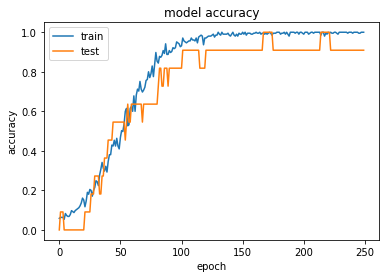

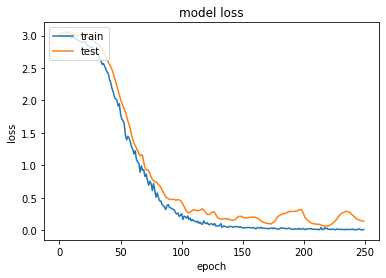

In [19]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#**Step 8. Iterate the model until the accuracy is above 90%**

In [20]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)
print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.1383
test acc 0.9091


#**Successfully reached the Accuracy to 90%**